In [1]:
using ClimaAnalysis
using CairoMakie
using Statistics
import ClimaAnalysis.Visualize as viz

# Calibration Vizualization

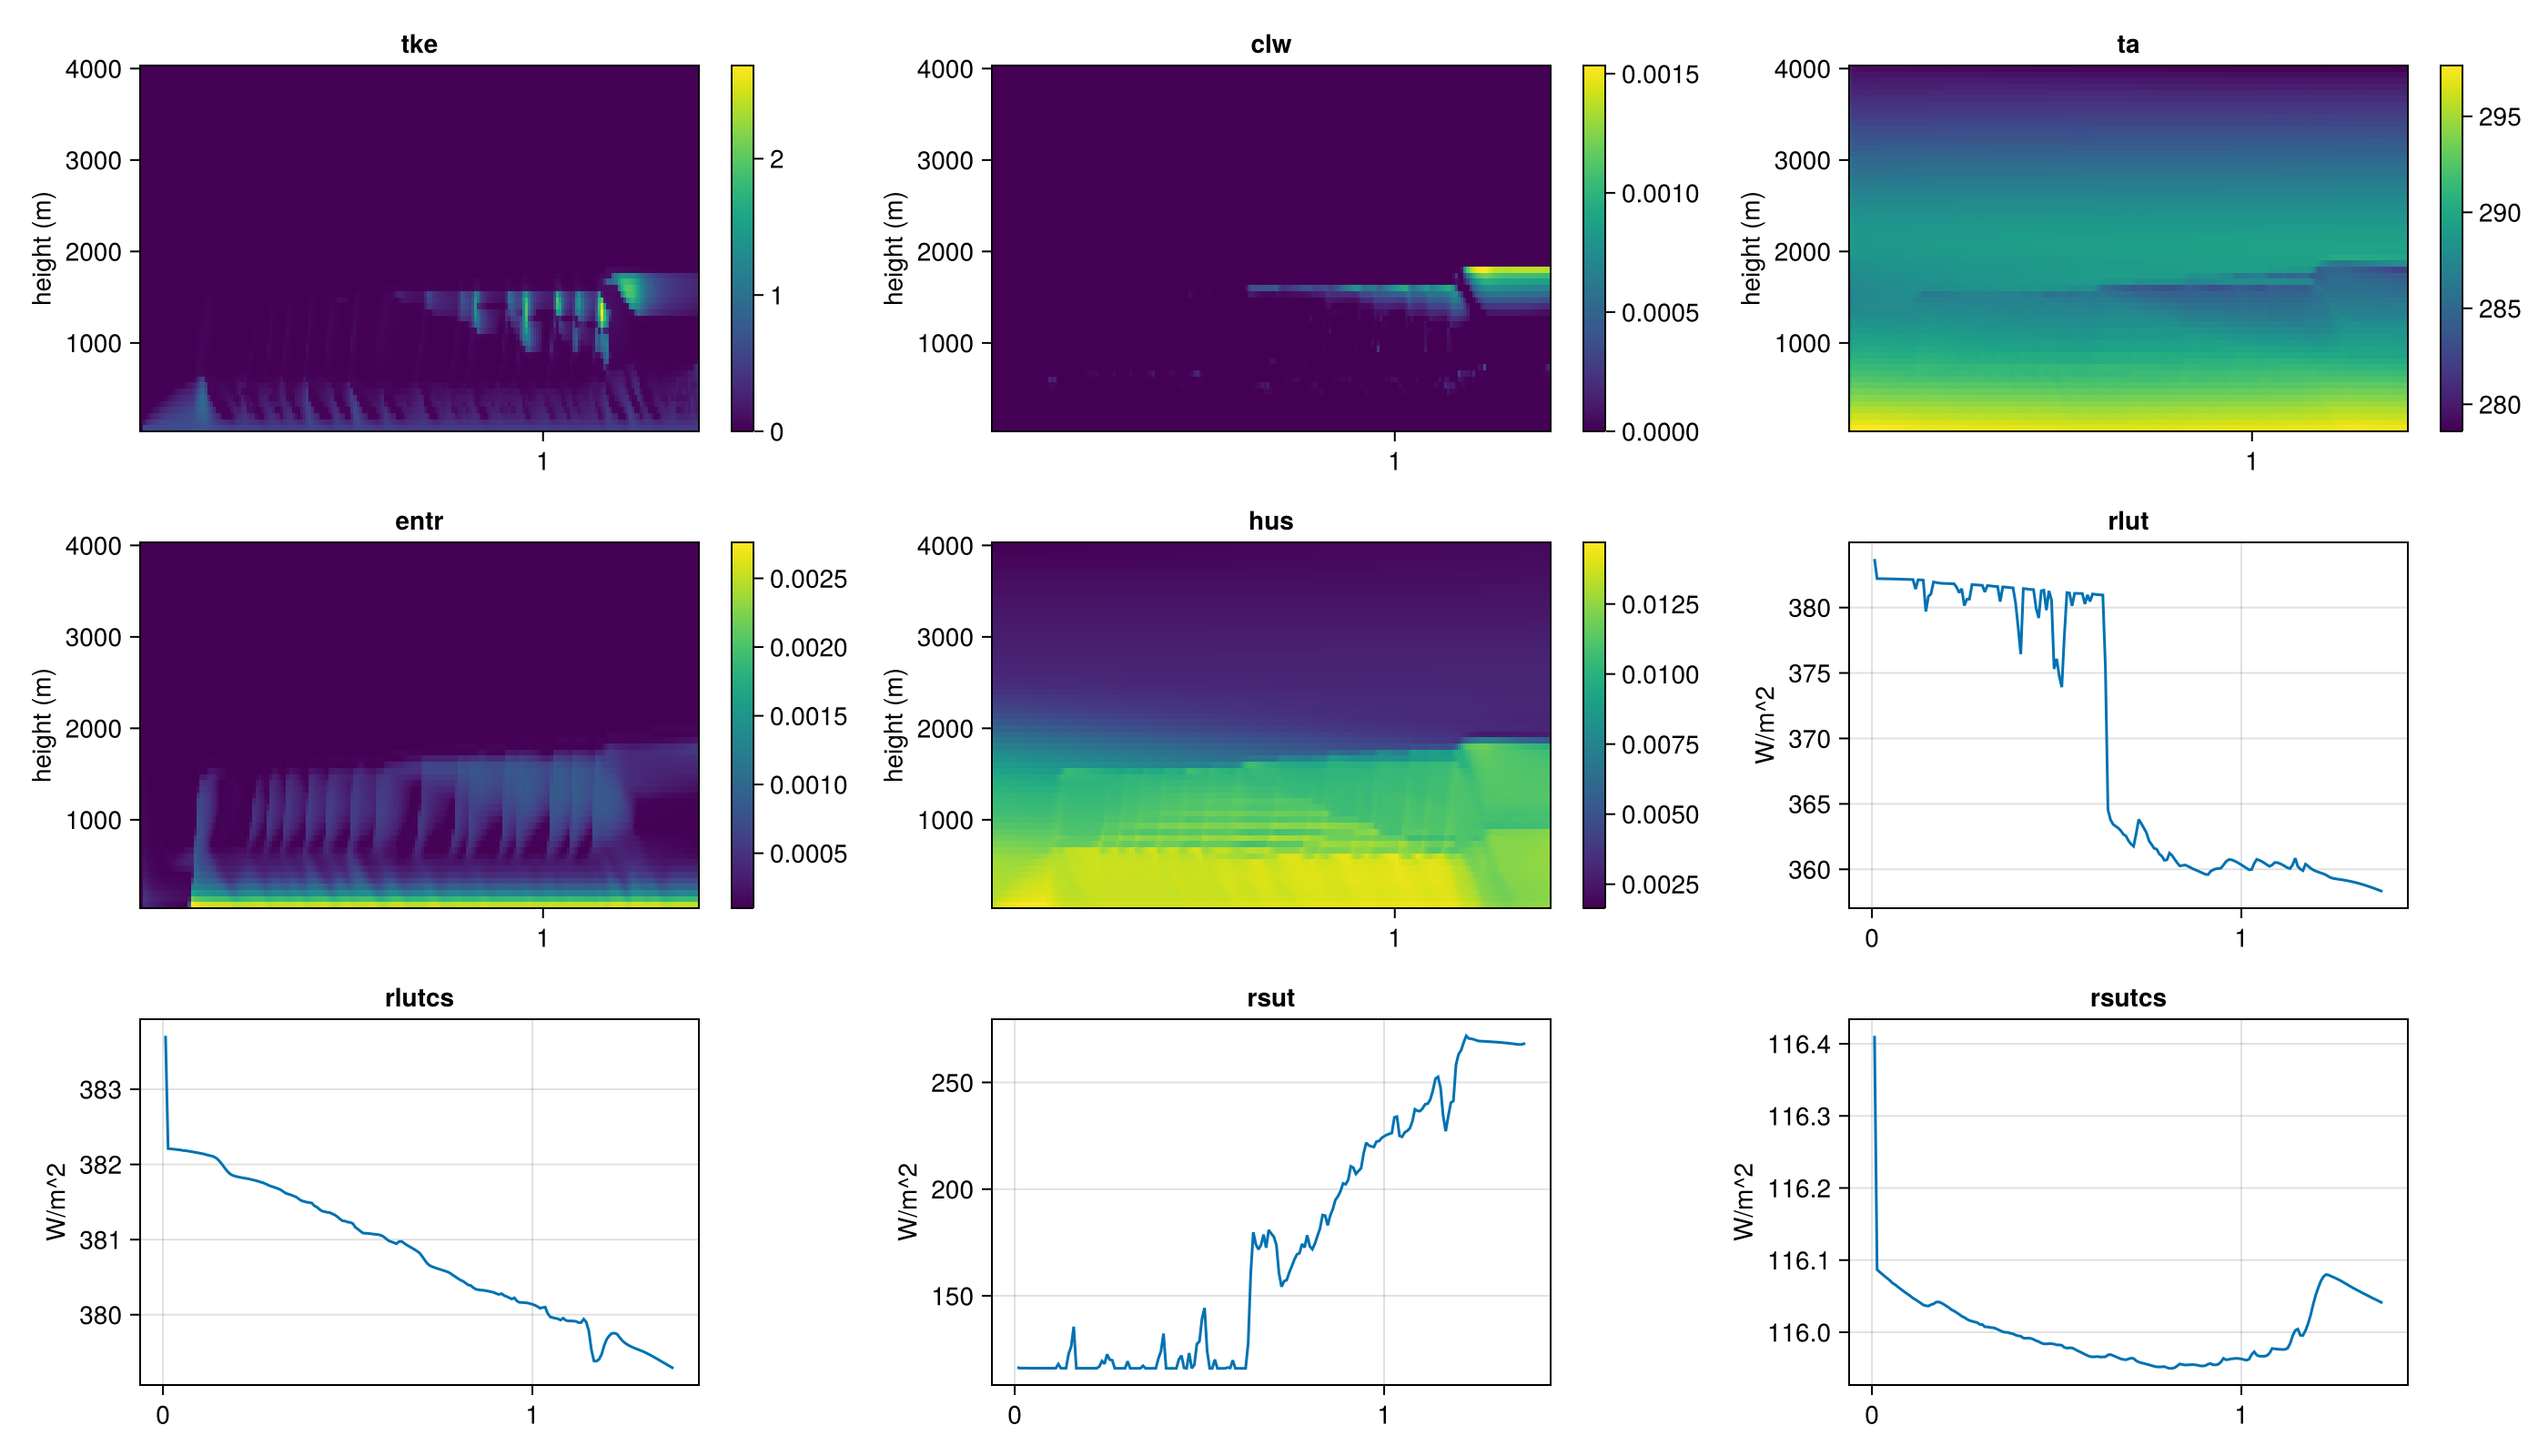

In [2]:
simdir = SimDir(joinpath("output", "gcm_driven_scm", "output_active"))

fig = Figure(size=(1400,800))

function add_var(var, ind = 1, col = 1, lines = false)
    # get data 
    da = get(simdir; short_name = var, period = "10m")
    if lines
        ax = Axis(fig[col, ind], ylabel = "W/m^2", title = var,
        xticks = (collect(0:6*24:6*6*24), string.(Integer.(collect(0:1:6)))))
        ln = lines!(da.data[:, 1, 1])
       # Colorbar(fig[col, ind+1], ln, label = var)
    else
        ax = Axis(fig[col, ind], ylabel = "height (m)", title = var,
        yticks = (0:15:60, string.(Integer.(collect(0:4e3/4:4e3)))),
        xticks = (collect(0:6*24:6*6*24), string.(Integer.(collect(0:1:6)))))
        hm = heatmap!(da.data[:, 1, 1, :])
        Colorbar(fig[col, ind+1], hm)
    end
end
add_var("tke")
add_var("clw", 3)
add_var("ta", 5)
add_var("entr", 1, 2)
add_var("hus",3, 2)
add_var("rlut", 5, 2, true)
add_var("rlutcs", 1, 3, true)
add_var("rsut", 3, 3, true)
add_var("rsutcs", 5, 3, true)

# map(x -> add_var(x, ))
fig

In [41]:
rlut = get(simdir; short_name = "rlut", period = "10m")

rlut.data[:, 1, 1]


199-element Vector{Float32}:
 383.711
 382.21103
 382.20703
 382.20325
 382.19965
 382.19525
 382.19098
 382.18457
 382.18173
 382.1763
   ⋮
 358.85648
 358.79675
 358.73444
 358.66876
 358.6002
 358.5295
 358.45593
 358.3796
 358.30127

(size(ta.data))[1] = 199


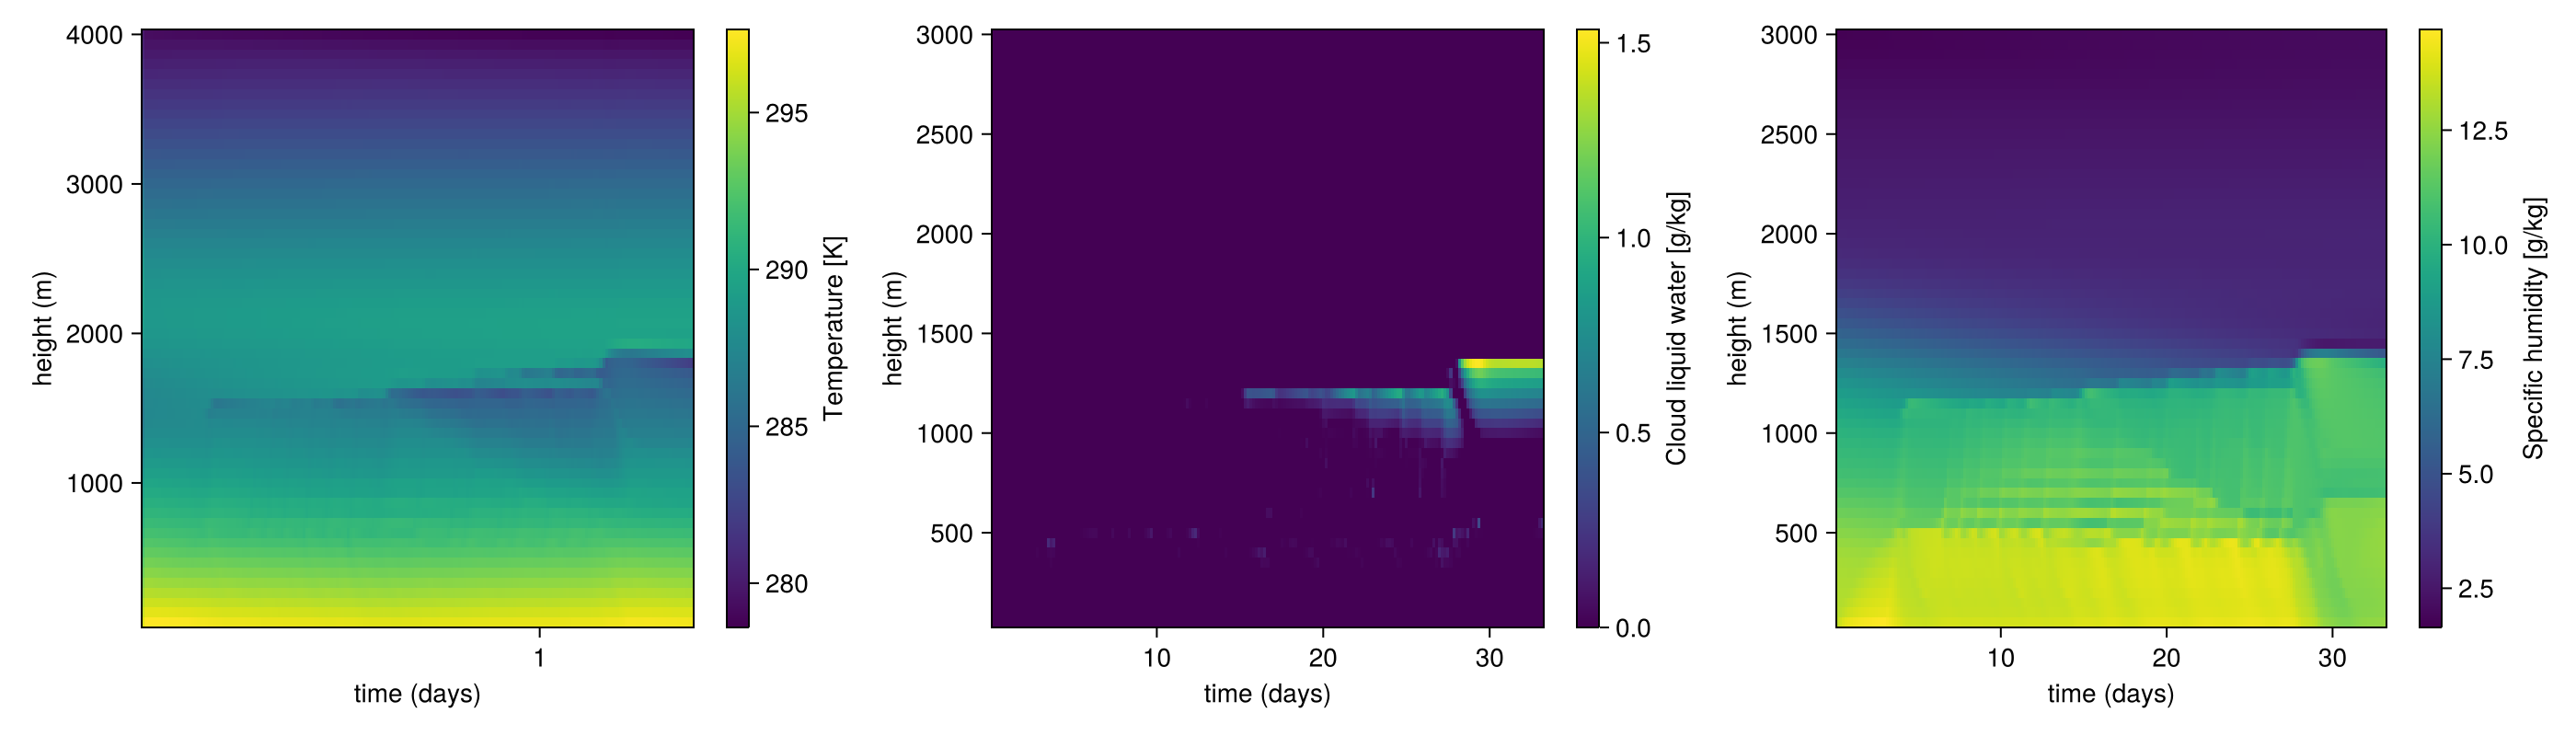

In [27]:
simdir = SimDir(joinpath("output", "gcm_driven_scm", "output_active"))

ta = get(simdir; short_name = "ta",  period = "10m")
# check shape 
@show size(ta.data)[1]
tke = get(simdir; short_name = "tke", period = "10m")
clw = get(simdir; short_name = "clw", period = "10m")
hus = get(simdir; short_name = "hus", period = "10m")
# waup = get(simdir; short_name = "waup", reduction = "average", period = "1d")
# clwup = get(simdir; short_name = "clwup", reduction = "average", period = "1d")
fig = Figure(size=(1400, 400))
ax = Axis(fig[1, 1], xlabel = "time (days)", ylabel = "height (m)", 
            yticks = (0:15:60, string.(Integer.(collect(0:4e3/4:4e3)))),
            xticks = (collect(0:6*24:6*6*24), string.(Integer.(collect(0:1:6)))))
# ax.yticks = 1:60
# ax.ytickformat = 0:3e3/60:3e3

hm = heatmap!(ta.data[:, 1, 1, :])
Colorbar(fig[:, 1+1], hm, label = "Temperature [K]")

ax2 = Axis(fig[1, 3], xlabel = "time (days)", ylabel = "height (m)", 
            yticks = (0:10:60, string.(Integer.(collect(0:3e3/6:3e3)))),
            xticks = (0:60:300, string.(Integer.(collect(0:60*10/60:300*10/60)))))
hm2 = heatmap!(clw.data[:, 1, 1, :] .* 1000)
Colorbar(fig[:, 3+1], hm2, label = "Cloud liquid water [g/kg]")

ax3 = Axis(fig[1, 5], xlabel = "time (days)", ylabel = "height (m)", 
            yticks = (0:10:60, string.(Integer.(collect(0:3e3/6:3e3)))),
            xticks = (0:60:300, string.(Integer.(collect(0:60*10/60:300*10/60)))))
hm3 = heatmap!(hus.data[:, 1, 1, :] .* 1000)
Colorbar(fig[:, end+1], hm3, label = "Specific humidity [g/kg]")
fig

In [23]:
println(summary(simdir))

Output directory: output/gcm_driven_scm/output_active
Variables:
- tke
    inst (10m)
- clw
    inst (10m)
- entr
    inst (10m)
- arup
    inst (10m)
- hus
    inst (10m)
- thetaa
    inst (10m)
- ta
    inst (10m)
- waup
    inst (10m)
- detr
    inst (10m)


In [19]:
mean(ta.data, dims=(2,3))

1017×1×1×60 Array{Float32, 4}:
[:, :, 1, 1] =
 296.67633
 297.6218
 297.65665
 297.67926
 297.69382
 297.70218
 297.70572
 297.7062
 297.70508
 297.7032
 297.7008
 297.6981
 297.69504
   ⋮
 298.55145
 298.5563
 298.55576
 298.55783
 298.57156
 298.58035
 298.5767
 298.5682
 298.5601
 298.55615
 298.5558
 298.5593

[:, :, 1, 2] =
 295.99133
 296.8941
 296.8973
 296.90836
 296.91922
 296.92834
 296.9352
 296.93954
 296.94174
 296.94208
 296.94122
 296.93942
 296.93704
   ⋮
 298.05145
 298.04703
 298.04675
 298.05167
 298.05652
 298.05438
 298.05295
 298.0551
 298.06036
 298.0651
 298.0679
 298.0676

[:, :, 1, 3] =
 295.33493
 296.2416
 296.22885
 296.22098
 296.22128
 296.22614
 296.23206
 296.2375
 296.2414
 296.24362
 296.24454
 296.24423
 296.24326
   ⋮
 297.41223
 297.41043
 297.41046
 297.42435
 297.4285
 297.42007
 297.41327
 297.40866
 297.4088
 297.41333
 297.4202
 297.42474

;;;; … 

[:, :, 1, 58] =
 280.5602
 279.879
 279.88156
 279.88406
 279.88647
 279.88885
 279.89108
 279.8

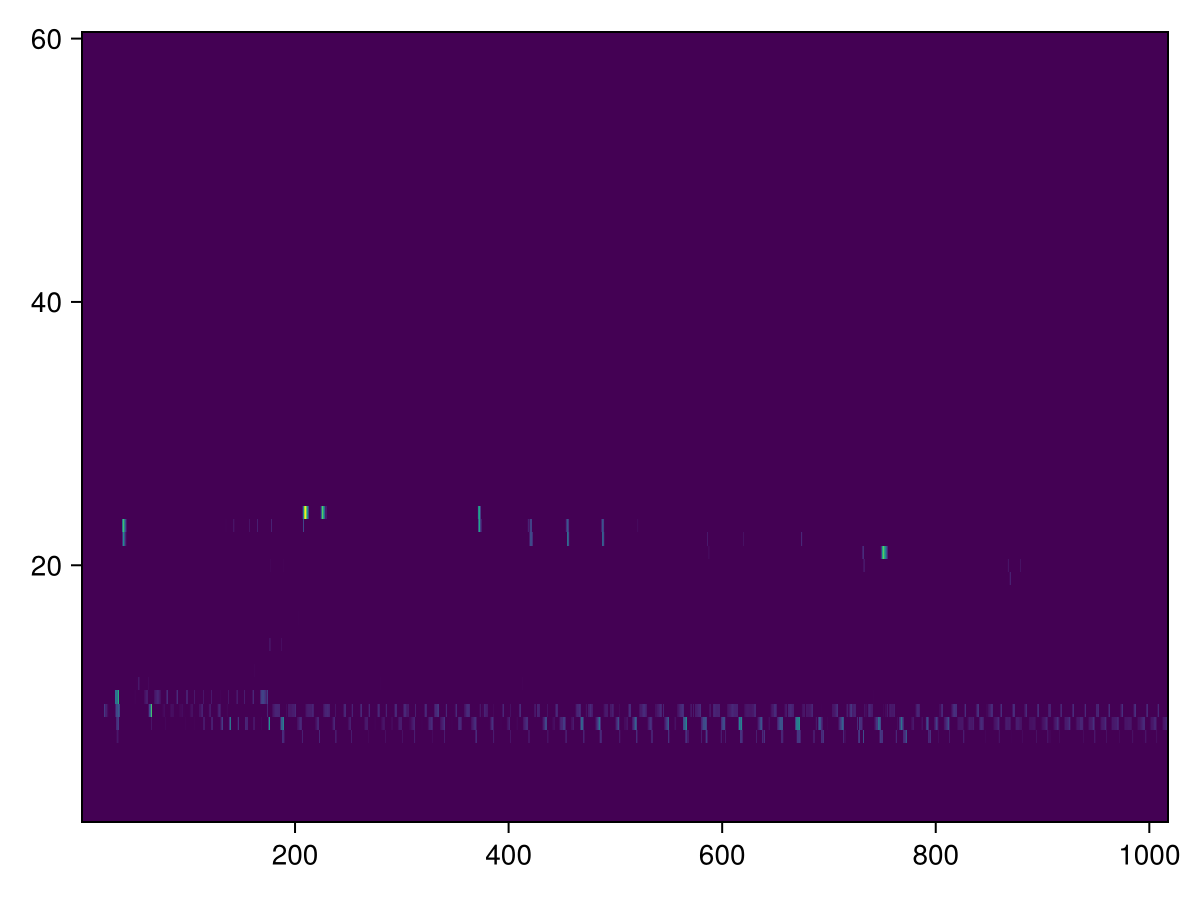

In [6]:
heatmap(clw.data[:, 1, 1, :])

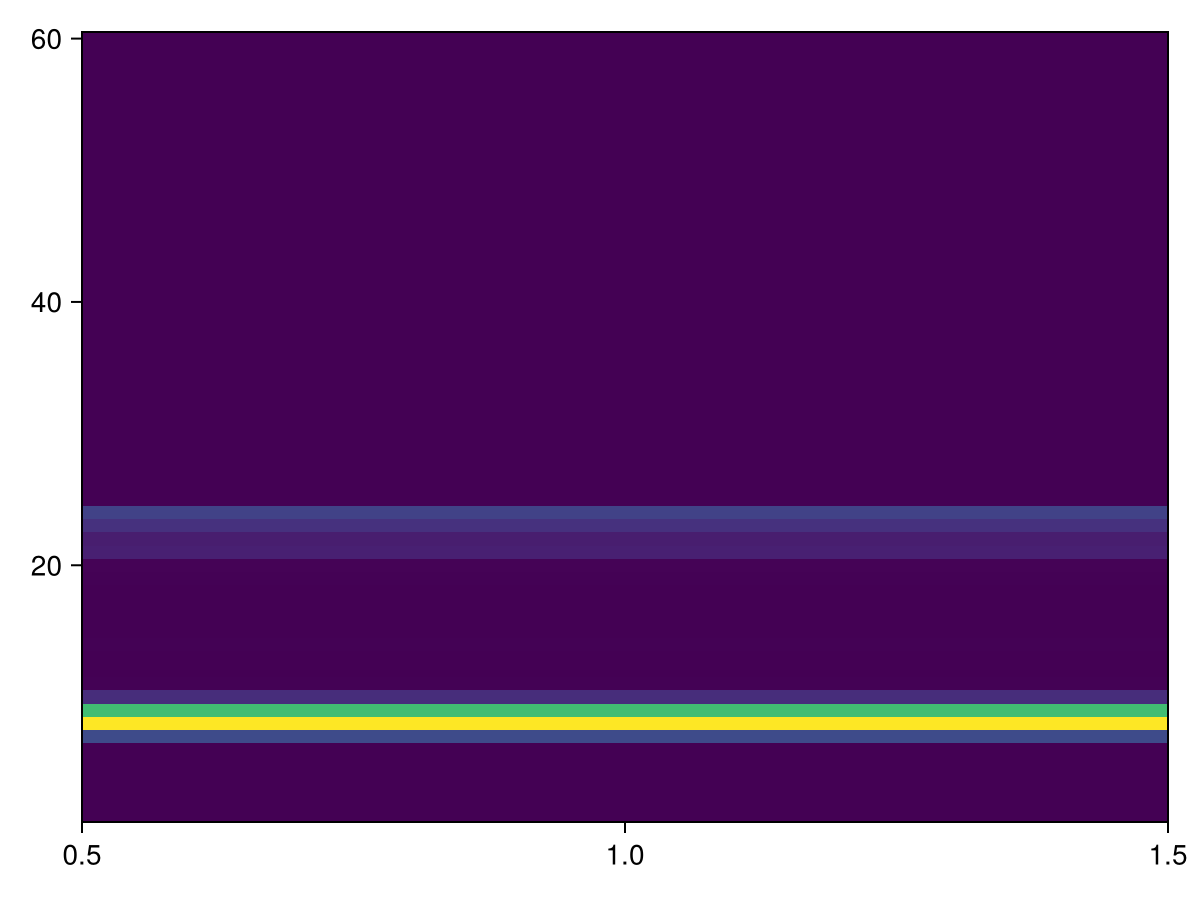

In [13]:
plot(mean(clw.data[:, 1, 1, :], dims=1))

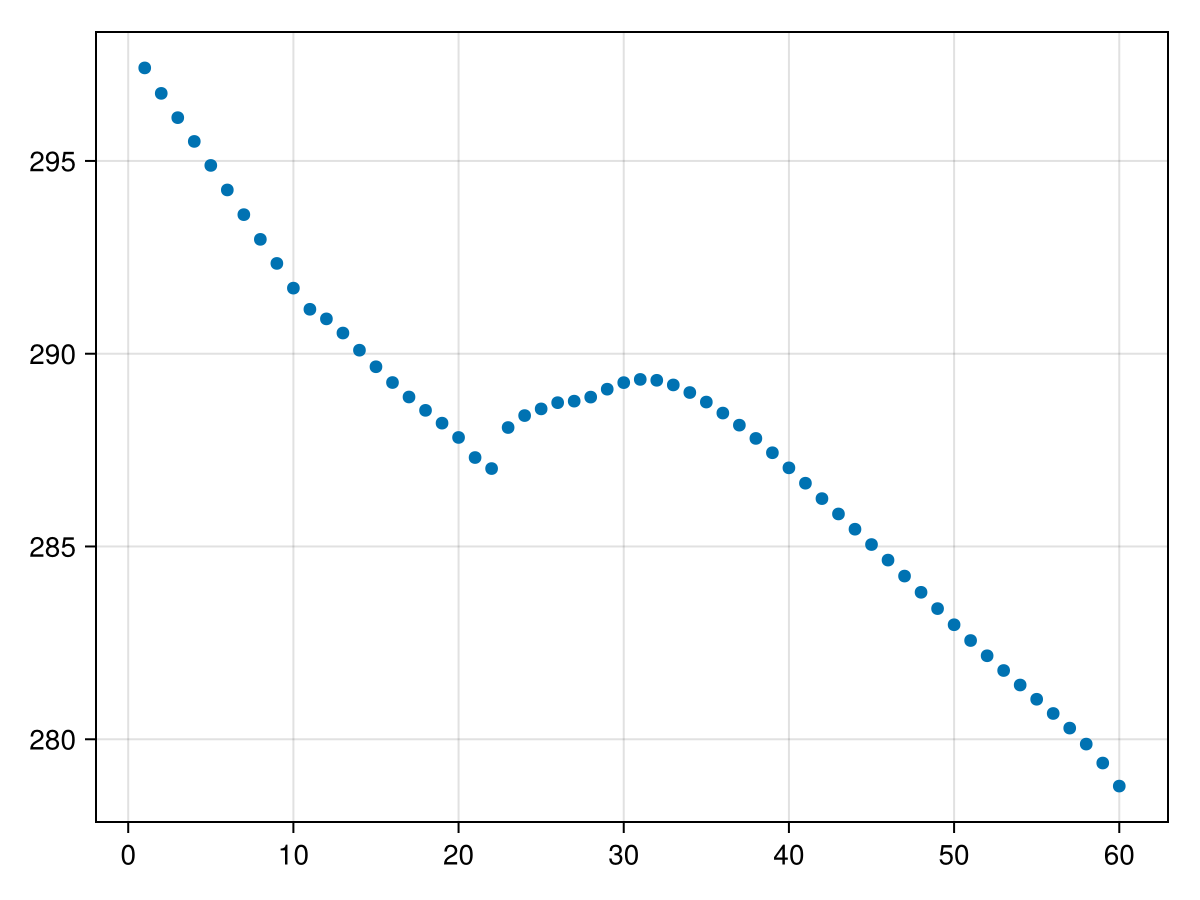

In [14]:
plot(ta.data[end-1, 1, 1, :])

In [54]:
using LinearAlgebra
function H_perf(dir::String, short_names; noise = 0.01, cutoff=50, output_cov = true)
    """Single Variable Calibration"""
	simdir = ClimaAnalysis.SimDir(joinpath(dir, "output_active")) # allow for flexibility in choosing data directory
    means = []
    for short_name in short_names
        obs = ClimaAnalysis.get(simdir; short_name = short_name, period = "10m")
    
        # compute data
        obs_dat = reshape(mean(obs.data[cutoff:end, :, :, :], dims=(2,3)), size(obs.data)[1]-cutoff+1, size(obs.data)[end])
        # compute time mean
        obs_mean = vec(mean(obs_dat, dims=1))

        # normalize 
        obs_mean = (obs_mean .- mean(obs_mean)) ./ std(obs_mean)
        # compute covariance if required
        append!(means, obs_mean)
    end
    if output_cov 
        obs_cov = noise .* Matrix(I, length(means), length(means))
        return means, obs_cov
    else
        return means
    end
end	

obs_mean, obs_cov = H_perf("../explore_loss_functions/output/obs_ta_0.001/iteration_000/member_001", ["ta", "hus", "clw"], cutoff=1)

(Any[2.1341918f0, 2.0219626f0, 1.9144336f0, 1.8078843f0, 1.7020408f0, 1.5963616f0, 1.507332f0, 1.4140748f0, 1.3045588f0, 1.1987768f0  …  -0.25202885f0, -0.25202885f0, -0.25202885f0, -0.25202885f0, -0.25202885f0, -0.25202885f0, -0.25202885f0, -0.25202885f0, -0.25202885f0, -0.25202885f0], [0.01 0.0 … 0.0 0.0; 0.0 0.01 … 0.0 0.0; … ; 0.0 0.0 … 0.01 0.0; 0.0 0.0 … 0.0 0.01])

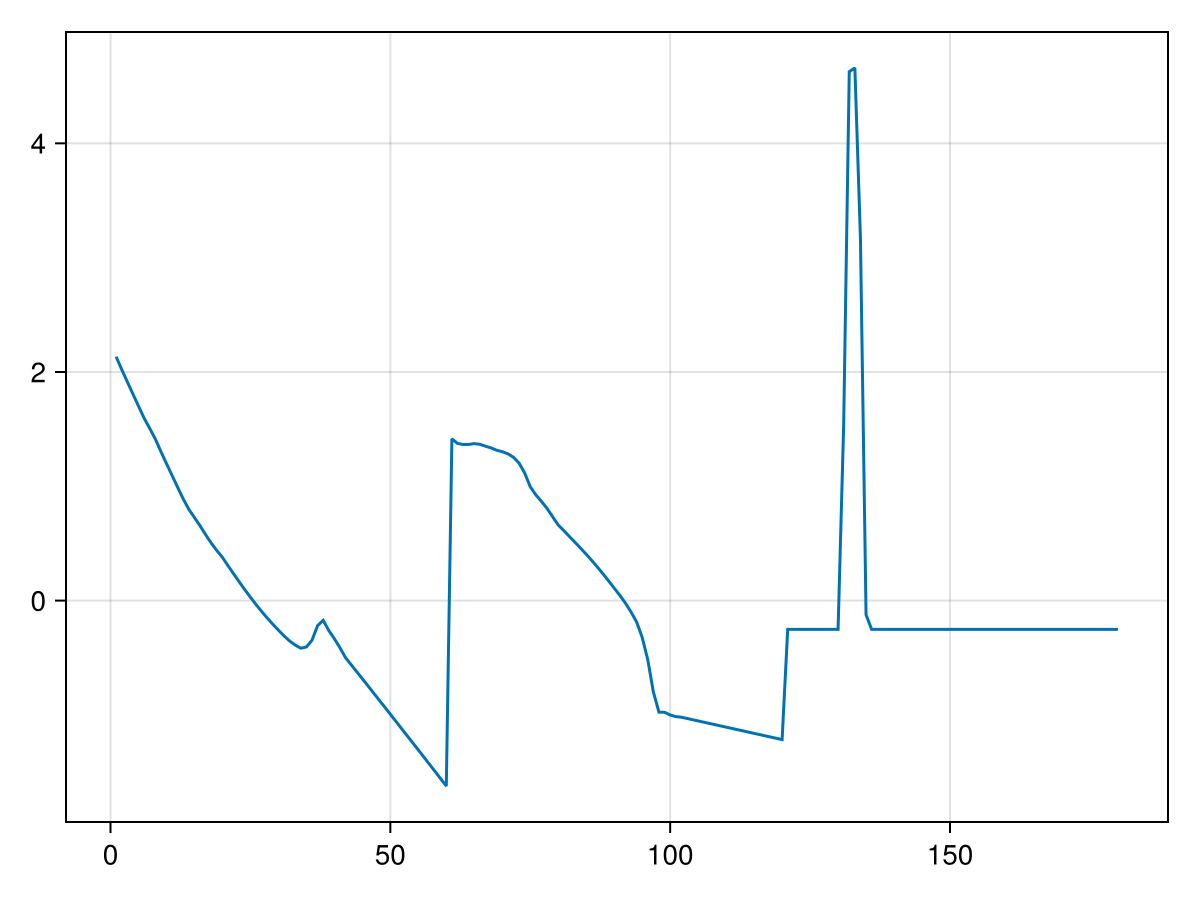

In [56]:
lines(obs_mean)
# heatmap(obs_cov)

In [44]:
simdir = ClimaAnalysis.SimDir(joinpath("../explore_loss_functions/output/obs_ta_0.001/iteration_000/member_007", "output_active"))
obs = ClimaAnalysis.get(simdir; short_name = "ts", period = "10m")
obs_dat = vec(mean(obs.data[1:end, :, :], dims=(2,3)))
obs_mean = vec(mean(obs_dat, dims=1))
# normalize
obs_mean = (obs_mean .- mean(obs_mean)) ./ std(obs_mean)
println(obs_mean)
# print(obs_dat)
# fig, ax= lines(obs_dat)
# xlims!(299, 302)
# fig

Float32[NaN]


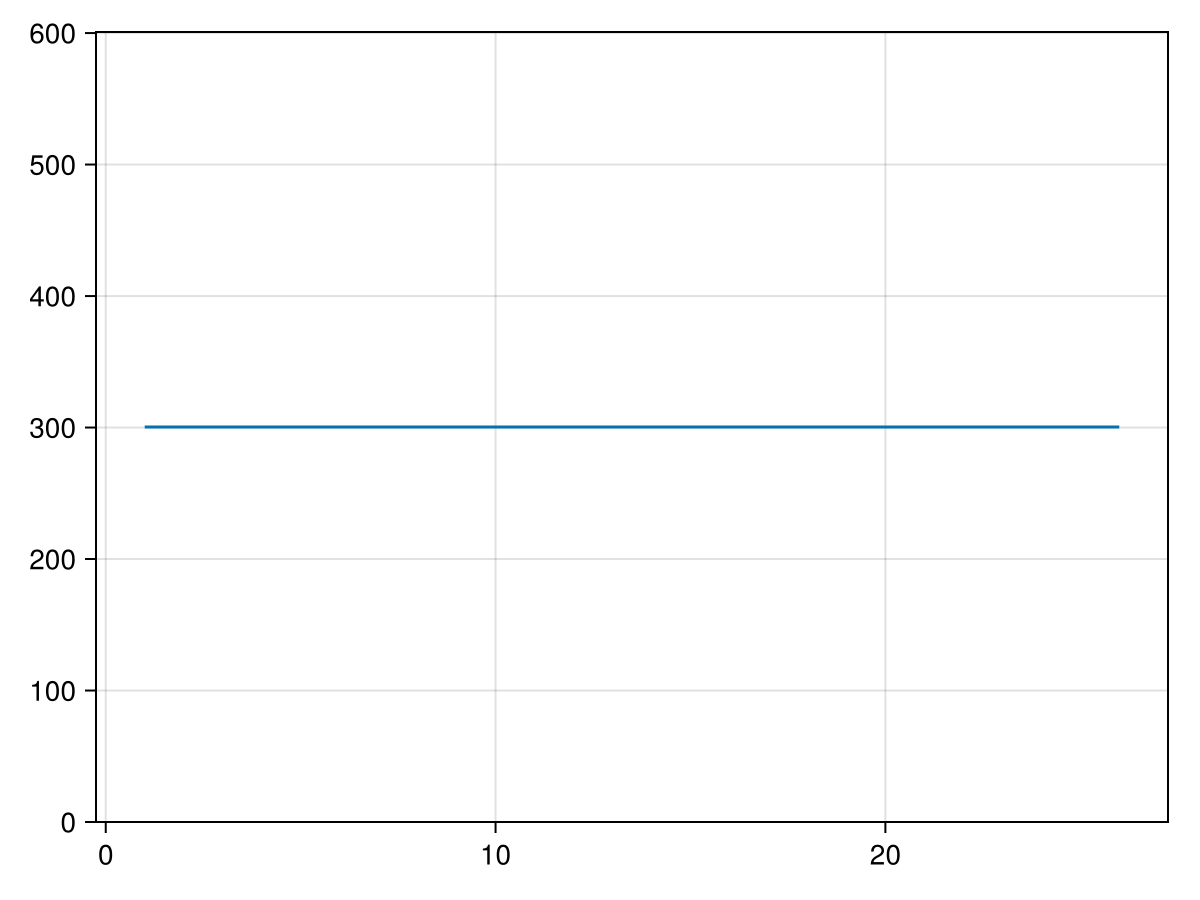

# GCM-driven TOA

In [3]:
import NCDatasets as NC

In [4]:
# read in external forcing file 
file_GCMLES = "/groups/esm/zhaoyi/GCMForcedLES/cfsite/07/HadGEM2-A/amip/Output.cfsite23_HadGEM2-A_amip_2004-2008.07.4x/stats/Stats.cfsite23_HadGEM2-A_amip_2004-2008.07.nc"
file_GCM = "/groups/esm/zhaoyi/GCMForcedLES/forcing/corrected/HadGEM2-A_amip.2004-2008.07.nc"

GCMLES = NC.Dataset(file_GCMLES)
GCM = NC.Dataset(file_GCM)
GCMLES

Dataset: /groups/esm/zhaoyi/GCMForcedLES/cfsite/07/HadGEM2-A/amip/Output.cfsite23_HadGEM2-A_amip_2004-2008.07.4x/stats/Stats.cfsite23_HadGEM2-A_amip_2004-2008.07.nc
Group: /

Groups
  Dataset: /groups/esm/zhaoyi/GCMForcedLES/cfsite/07/HadGEM2-A/amip/Output.cfsite23_HadGEM2-A_amip_2004-2008.07.4x/stats/Stats.cfsite23_HadGEM2-A_amip_2004-2008.07.nc
  Group: profiles

  Dimensions
     z = 200
     t = 865

  Variables
    z     (200)
      Datatype:    Float64 (Float64)
      Dimensions:  z

    z_half     (200)
      Datatype:    Float64 (Float64)
      Dimensions:  z

    t     (865)
      Datatype:    Float64 (Float64)
      Dimensions:  t

    thetas_mean     (200 × 865)
      Datatype:    Float64 (Float64)
      Dimensions:  z × t
      Attributes:
       units                = None
       nice_name            = None
       description          = None

    thetas_mean2     (200 × 865)
      Datatype:    Float64 (Float64)
      Dimensions:  z × t
      Attributes:
       units       

In [5]:
for (groupname,group) in GCM.group["site2"]
    # all groups
    #@show (groupname,group)
    println(groupname)
end

lon
lat
site
lev
time
zg
ta
hus
ua
va
wap
cl
cli
clw
hur
tnta
tnhusa
ps
ts
rsdt
hfls
hfss
pfull
alpha
tntwork
tntva
tnhusva
tntha
tnhusha
tntr
pr
label
th
thli
rsut
rsutcs
rlut
rlutcs
coszen
gustiness
windstd
windrms
clwvi
clivi
lwp3000


In [6]:
GCM.group["site2"]["time"][2]

CFTime.DateTime360Day(2004-07-01T06:00:00)

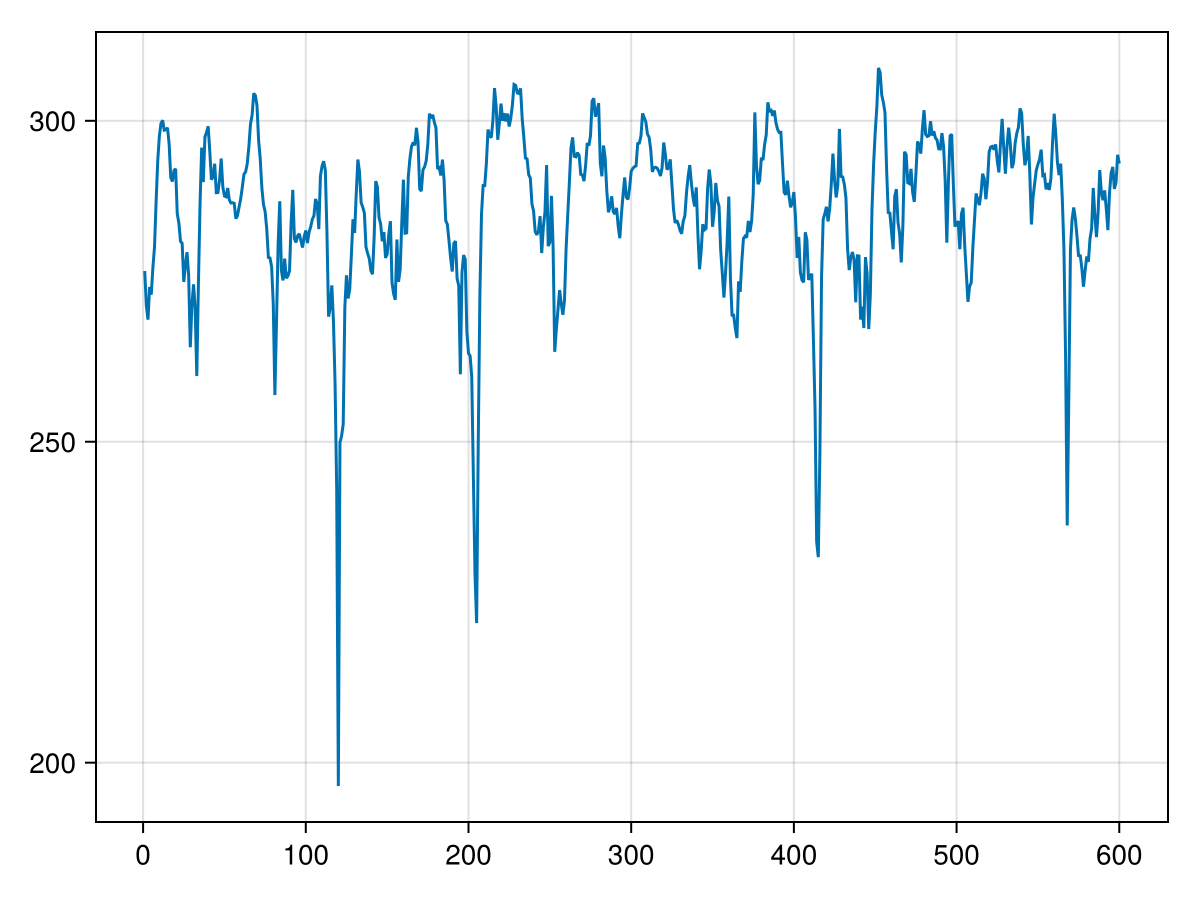

In [8]:
lines(mean(GCM.group["site2"]["rlut"], dims=2)[:]) #GCM.group["site2"]["time"][:]

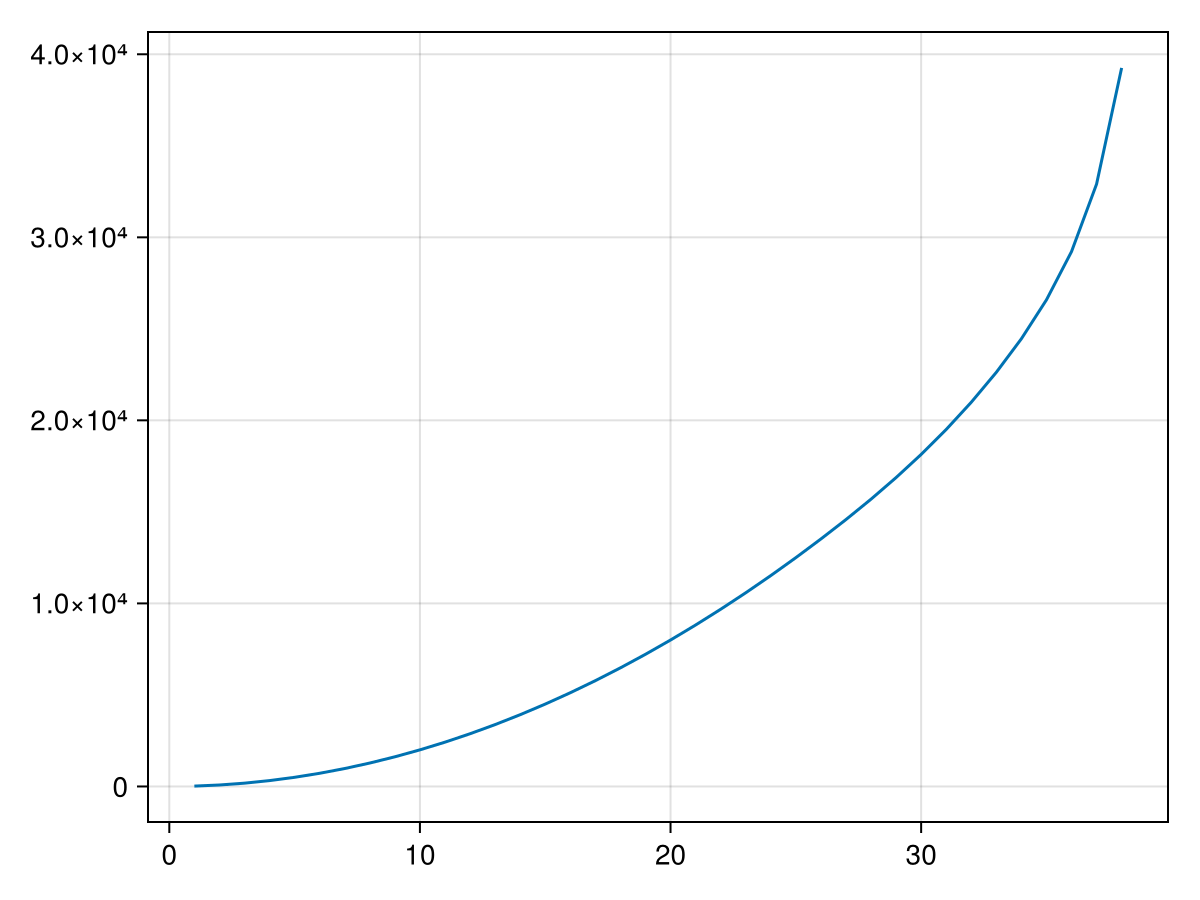

In [9]:
lines(GCM.group["site2"]["lev"][:])

In [10]:
# GCMLES.group["profiles"]["z"][:]
for (groupname,group) in GCMLES.group["profiles"]
    # all groups
    #@show (groupname,group)
    println(groupname)
end

z
z_half
t
thetas_mean
thetas_mean2
thetas_mean3
thetas_max
thetas_min
theta_mean
theta_mean2
theta_mean3
theta_max
theta_min
rh_mean
rh_max
rh_min
cloud_fraction
cloud_cum_fraction
qr_sedimentation_flux
qr_autoconversion
qr_accretion
qr_evaporation
s_autoconversion
s_accretion
s_evaporation
s_precip_heating
s_precip_drag
qr_mean
qr_mean2
qr_mean3
qr_max
qr_min
qt_mean
qt_mean2
qt_mean3
qt_max
qt_min
s_mean
s_mean2
s_mean3
s_max
s_min
u_mean
u_translational_mean
u_mean2
u_mean3
u_max
u_min
w_mean
w_mean2
w_mean3
w_max
w_min
v_mean
v_translational_mean
v_mean2
v_mean3
v_max
v_min
qt_s_product_mean
strain_rate_magnitude
wind_speed
wind_angle
s_flux_z
qt_flux_z
qr_flux_z
s_sgs_flux_z
qt_sgs_flux_z
qr_sgs_flux_z
u_sgs_flux_z
v_sgs_flux_z
w_sgs_flux_z
sgs_visc_s_source_mean
sgs_visc_s_source_min
sgs_visc_s_source_max
buoyancy_frequency_mean
buoyancy_frequency_mean2
buoyancy_frequency_mean3
buoyancy_frequency_max
buoyancy_frequency_min
temperature_mean
temperature_mean2
temperature_mean3
tem

In [11]:
# for (varname, var) in GCM.groups
#     @show (varname, var)
# end
GCMLES.group["profiles"]["z"][:]

200-element Vector{Float64}:
   20.0
   40.0
   60.0
   80.0
  100.0
  120.0
  140.0
  160.0
  180.0
  200.0
    ⋮
 3840.0
 3860.0
 3880.0
 3900.0
 3920.0
 3940.0
 3960.0
 3980.0
 4000.0

In [74]:
GCM.group["site2"]

Dataset: /groups/esm/zhaoyi/GCMForcedLES/forcing/corrected/HadGEM2-A_amip.2004-2008.07.nc
Group: site2

Dimensions
   lev = 38
   time = 600

Variables
  lon  
    Attributes:
     _FillValue           = NaN
     standard_name        = longitude
     long_name            = Longitude
     units                = degrees_east

  lat  
    Attributes:
     _FillValue           = NaN
     standard_name        = latitude
     long_name            = Latitude
     units                = degrees_north

  site  
    Attributes:
     long_name            = site index

  lev   (38)
    Datatype:    Union{Missing, Float64} (Float64)
    Dimensions:  lev
    Attributes:
     _FillValue           = NaN
     bounds               = lev_bnds
     units                = m
     axis                 = Z
     positive             = up
     long_name            = hybrid height coordinate
     standard_name        = atmosphere_hybrid_height_coordinate
     formula              = z = a + b*orog
     formula_te

In [91]:
keys(GCM.group["site4"])[5:10]

6-element Vector{String}:
 "time"
 "zg"
 "ta"
 "hus"
 "ua"
 "va"

In [93]:
# typeof(GCM.group["site2"]["zg"])
GCM.group["site2"]["lev"]

lev (38)
  Datatype:    Union{Missing, Float64} (Float64)
  Dimensions:  lev
  Attributes:
   _FillValue           = NaN
   bounds               = lev_bnds
   units                = m
   axis                 = Z
   positive             = up
   long_name            = hybrid height coordinate
   standard_name        = atmosphere_hybrid_height_coordinate
   formula              = z = a + b*orog
   formula_terms        = a: lev b: b orog: orog


In [86]:
GCM.group["site2"]

Dataset: /groups/esm/zhaoyi/GCMForcedLES/forcing/corrected/HadGEM2-A_amip.2004-2008.07.nc
Group: site2

Dimensions
   lev = 38
   time = 600

Variables
  lon  
    Attributes:
     _FillValue           = NaN
     standard_name        = longitude
     long_name            = Longitude
     units                = degrees_east

  lat  
    Attributes:
     _FillValue           = NaN
     standard_name        = latitude
     long_name            = Latitude
     units                = degrees_north

  site  
    Attributes:
     long_name            = site index

  lev   (38)
    Datatype:    Union{Missing, Float64} (Float64)
    Dimensions:  lev
    Attributes:
     _FillValue           = NaN
     bounds               = lev_bnds
     units                = m
     axis                 = Z
     positive             = up
     long_name            = hybrid height coordinate
     standard_name        = atmosphere_hybrid_height_coordinate
     formula              = z = a + b*orog
     formula_te